## How well does pre-trained DeepDenoiser (trained on Northern California data) perform on OBS?

In [2]:
import obspy
import obsplus
import pandas as pd
from obspy.clients.fdsn import Client
from datetime import timedelta
import datetime
import matplotlib.pyplot as plt
import numpy as np
import logging
import requests
import seisbench
import seisbench.models as sbm
import dask
import json
from obspy.clients.fdsn import Client

# Progress bar for dask operations:
from dask.diagnostics import ProgressBar
pbar = dask.diagnostics.ProgressBar()
pbar.register()

client = Client("iris")

## Download data, denoise and plot!

#### Mw 5 earthquake in Cook Inlet, AK on shallow, Lamont Trawl Resistant OBS
- Just the beginning of the P-wave

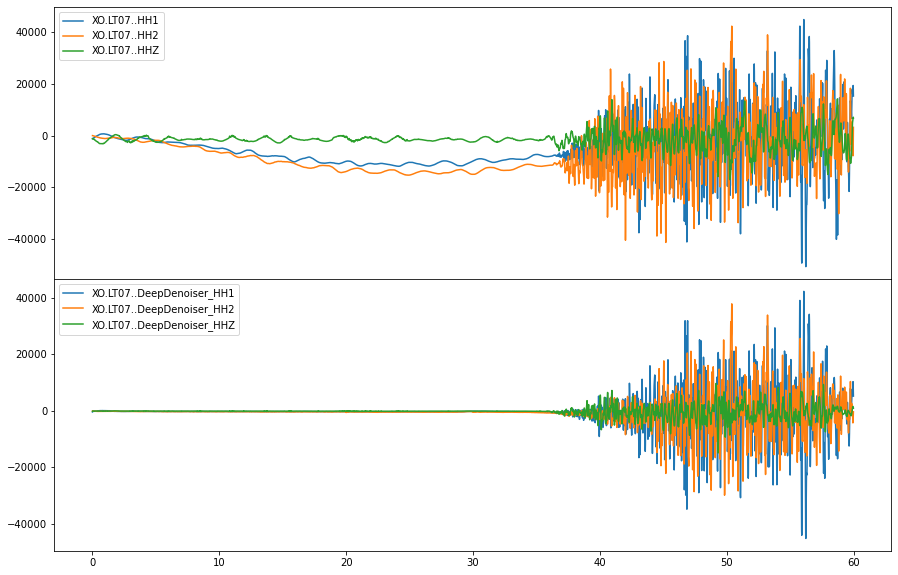

In [46]:
t1 = datetime.datetime(2019,5,27,9,52,30)
t2 = t1 + pd.Timedelta(60,'seconds')
st = client.get_waveforms('XO','LT07','','HH*',obspy.UTCDateTime(t1),obspy.UTCDateTime(t2))

# Denoise!
model = sbm.DeepDenoiser.from_pretrained("original")
denoised = model.annotate(st)

# Plot
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

for j in [0,1,2]:
    axs[0].plot(st[j].times(), st[j].data, label=st[j].id) 
    axs[1].plot(denoised[j].times(), denoised[j].data, label=denoised[j].id)

axs[0].legend()
axs[1].legend()

#### Mw 5 earthquake in Cook Inlet, AK on shallow, Lamont Trawl Resistant OBS
- the entire coda

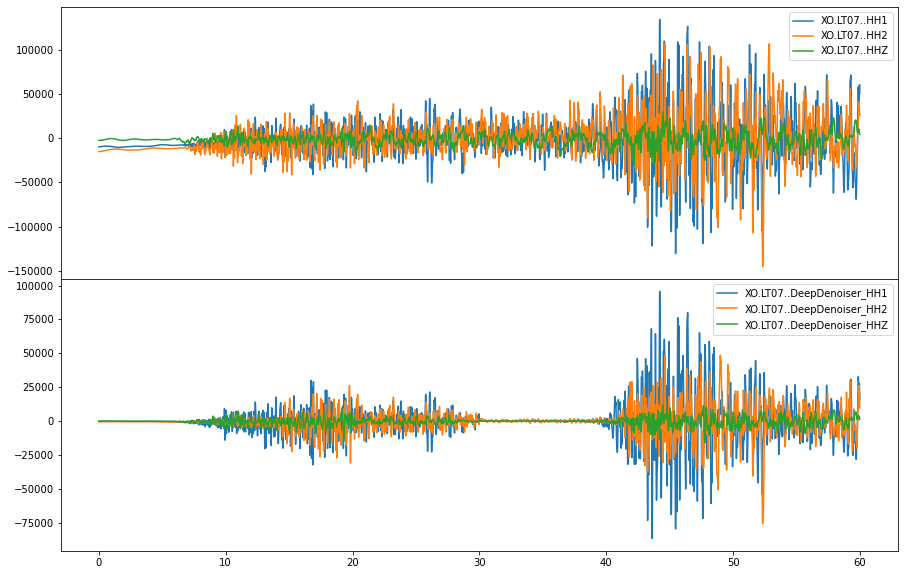

In [9]:
## Mw 5 earthquake in Cook Inlet, AK on OBS
    
t1 = datetime.datetime(2019,5,27,9,53)
t2 = t1 + pd.Timedelta(60,'seconds')
st = client.get_waveforms('XO','LT07','','HH*',obspy.UTCDateTime(t1),obspy.UTCDateTime(t2))

# Denoise!
model = sbm.DeepDenoiser.from_pretrained("original")
denoised = model.annotate(st)

# Plot
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

for j in [0,1,2]:
    axs[0].plot(st[j].times(), st[j].data, label=st[j].id) 
    axs[1].plot(denoised[j].times(), denoised[j].data, label=denoised[j].id)

axs[0].legend()
axs[1].legend()

#### Mw 2.6 earthquake in in Aleutian Islands, on the same OBS

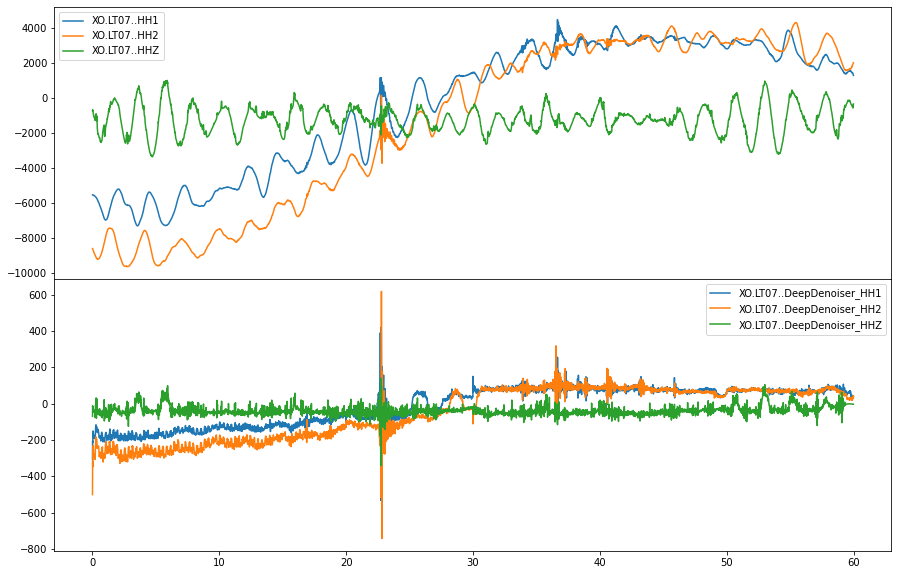

In [10]:
t1 = datetime.datetime(2019,5,27,10,45)
t2 = t1 + pd.Timedelta(60,'seconds')
st = client.get_waveforms('XO','LT07','','HH*',obspy.UTCDateTime(t1),obspy.UTCDateTime(t2))

# Denoise!
model = sbm.DeepDenoiser.from_pretrained("original")
denoised = model.annotate(st)

# Plot
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

for j in [0,1,2]:
    axs[0].plot(st[j].times(), st[j].data, label=st[j].id) 
    axs[1].plot(denoised[j].times(), denoised[j].data, label=denoised[j].id)

axs[0].legend()
axs[1].legend()

#### Mw 2.6 earthquake in Aleutian Islands, on a nearby OBS
Much lower SNR
Bandpass filtering appears to perform better

Text(0.5, 1.0, 'Deep Denoiser, Bandpass Filtered')

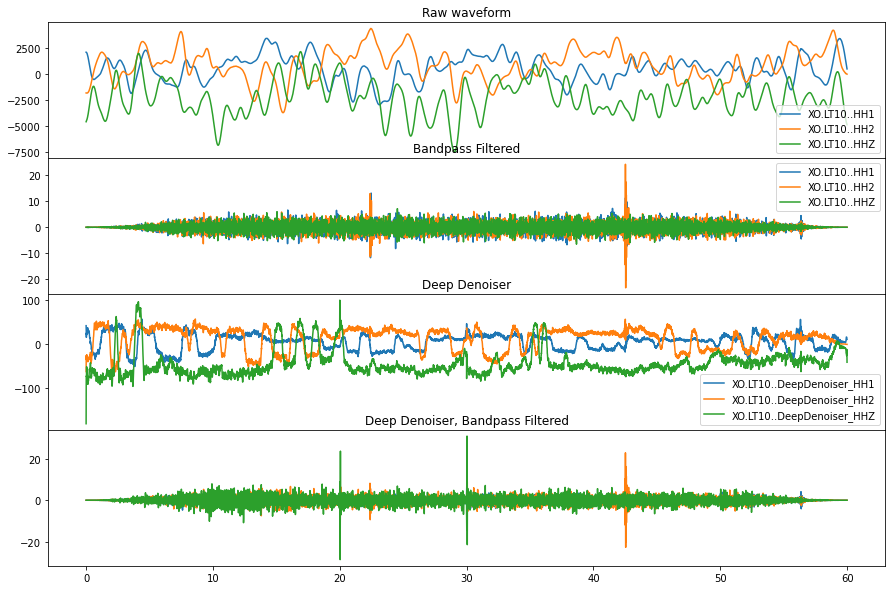

In [47]:
t1 = datetime.datetime(2019,5,27,10,47)
t2 = t1 + pd.Timedelta(1,'minutes')
st = client.get_waveforms('XO','LT10','','HH*',obspy.UTCDateTime(t1),obspy.UTCDateTime(t2))

# Denoise!
model = sbm.DeepDenoiser.from_pretrained("original")
denoised = model.annotate(st)

filtered = st.copy().filter('bandpass',freqmin=8,freqmax=35)
filtered.taper(max_percentage=0.2)
filtered_denoised = denoised.copy().filter('bandpass',freqmin=8,freqmax=35)
filtered_denoised.taper(max_percentage=0.2)

# Plot
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0})

for j in [0,1,2]:
    axs[0].plot(st[j].times(), st[j].data, label=st[j].id) 
    axs[1].plot(filtered[j].times(), filtered[j].data, label=filtered[j].id) 
    axs[2].plot(denoised[j].times(), denoised[j].data, label=denoised[j].id)
    axs[3].plot(filtered_denoised[j].times(), filtered_denoised[j].data, label=filtered_denoised[j].id)

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_title('Raw waveform')
axs[1].set_title('Bandpass Filtered')
axs[2].set_title('Deep Denoiser')
axs[3].set_title('Deep Denoiser, Bandpass Filtered')


# axs[0].set_xlim([40,50])

#### Mw 2.6 earthquake in Aleutian Islands, on a nearby OBS

#### Magnitude 1 earthquake in Endeavour vent fields on OBS
Bandpass filtering actually seems to do better!

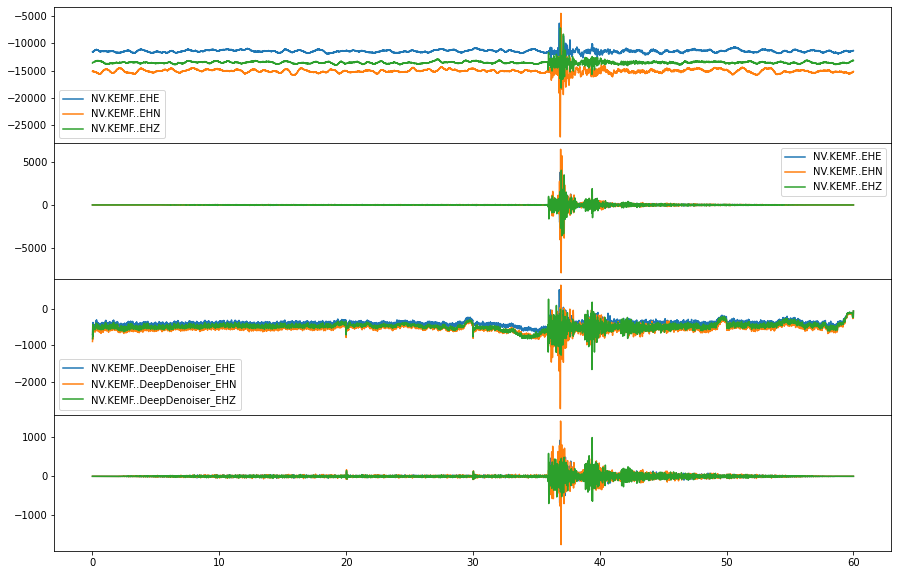

In [31]:
## Magnitude 1 earthquake in Endeavour vent fields on OBS
    
t1 = datetime.datetime(2018,9,9,8,20,30)
t2 = t1 + pd.Timedelta(60,'seconds')
st = client.get_waveforms('NV','KEMF','','EH*',obspy.UTCDateTime(t1),obspy.UTCDateTime(t2))

# Denoise!
model = sbm.DeepDenoiser.from_pretrained("original")
denoised = model.annotate(st)

filtered = st.copy().filter('bandpass',freqmin=8,freqmax=35)
filtered.taper(max_percentage=0.2)
filtered_denoised = denoised.copy().filter('bandpass',freqmin=8,freqmax=35)
filtered_denoised.taper(max_percentage=0.2)

# Plot
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0})

for j in [0,1,2]:
    axs[0].plot(st[j].times(), st[j].data, label=st[j].id) 
    axs[1].plot(filtered[j].times(), filtered[j].data, label=filtered[j].id) 
    axs[2].plot(denoised[j].times(), denoised[j].data, label=denoised[j].id)
    axs[3].plot(filtered_denoised[j].times(), filtered_denoised[j].data, label=filtered_denoised[j].id)

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_title('Raw waveform')
axs[1].set_title('Bandpass Filtered')
axs[2].set_title('Deep Denoiser')
axs[3].set_title('Deep Denoiser, Bandpass Filtered')

# axs[0].set_xlim([32,50])

#### Fin whale calls on Endeavour OBS data- bandpass filter vs. DeepDenoiser

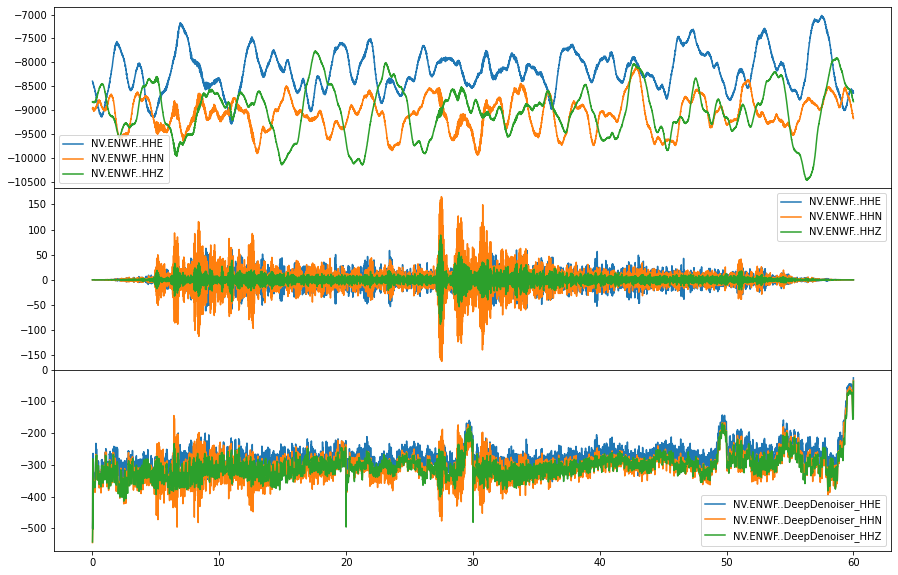

In [25]:
t1 = datetime.datetime(2019,3,21,23,2)
t2 = t1 + pd.Timedelta(60,'seconds')
st = client.get_waveforms('NV','ENWF','','HH*',obspy.UTCDateTime(t1),obspy.UTCDateTime(t2))

# Denoise!
model = sbm.DeepDenoiser.from_pretrained("original")
denoised = model.annotate(st)

filtered = st.copy().filter('bandpass',freqmin=8,freqmax=35)
filtered.taper(max_percentage=0.2)

# Plot
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0})

for j in [0,1,2]:
    axs[0].plot(st[j].times(), st[j].data, label=st[j].id) 
    axs[1].plot(filtered[j].times(), filtered[j].data, label=filtered[j].id) 
    axs[2].plot(denoised[j].times(), denoised[j].data, label=denoised[j].id)

axs[0].legend()
axs[1].legend()
axs[2].legend()

#axs[0].set_xlim([22,32])